<a href="https://colab.research.google.com/github/LuizFelipe-FF/Tratamento_DLIS/blob/main/ANP_Desafio_T%C3%A9cnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___
*Autor: Luiz Felipe Franco Ferreira - Graduando em Geologia*

*Atividade: Desafio Técnico (Python) - ANP*

*Data: 16/06/2025*

*Resumo: Código com objetivo de extrair dados pré definidos vindos de um arquivo DLIS, organiza-los como um DataFrame, realizar a limpeza e visualização dos dados e uma análise estatística.*
___

####Etapas:
1. Extração de dados (DLIS)
2. Limpeza de dados
3. Visualizações
4. Análise estatística

###1. Extração de Dados (DLIS)
Transforma os dados brutos do DLIS em um DataFrame

In [ ]:
pip install dlisio

In [2]:
import dlisio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def processar_arquivo_dlis(caminho_arquivo, curvas_desejadas=None):
    # Lista padrão de curvas, caso nenhuma seja informada
    if curvas_desejadas is None:
        curvas_desejadas = ['DT', 'GR', 'RHOB', 'NPHI', 'CALI']

    try:
        # Carrega o arquivo DLIS
        arquivos_logicos = dlisio.dlis.load(caminho_arquivo)

        # Verifica se o arquivo foi carregado corretamente
        if not arquivos_logicos:
            print("Nenhum conteúdo encontrado no arquivo DLIS.")
            return None, None

        # Usa apenas o primeiro LogicalFile
        logico = arquivos_logicos[0]

        # Lista para armazenar os DataFrames de cada frame
        todos_os_dados = []

        for frame in logico.frames:
            print("\nNome do Frame:", frame.name)
            print("Número de curvas disponíveis:", len(frame.channels))

            # Procura a curva de profundidade
            curva_profundidade = None
            for canal in frame.channels:
                if canal.name.upper() in ['TDEP']:
                    curva_profundidade = canal
                    break

            try:
                # Pega os dados das curvas do frame
                dados_frame = frame.curves()
            except Exception as erro:
                print("Erro ao ler as curvas:", erro)
                continue

            # Dicionário para armazenar as curvas desejadas
            dados_extraidos = {}

            for nome_curva in curvas_desejadas:
                # Verifica se a curva existe no conjunto de dados
                if nome_curva in dados_frame.dtype.names:
                    # Adiciona os dados ao dicionário dados_extraidos
                    dados_extraidos[nome_curva] = dados_frame[nome_curva]
                else:
                    print("Curva não encontrada:", nome_curva)

            if dados_extraidos:
                # Cria um DataFrame usando a curva de profundidade como índice
                profundidade = dados_frame[curva_profundidade.name]
                df = pd.DataFrame(dados_extraidos, index=profundidade)
                df.index.name = curva_profundidade.name
                todos_os_dados.append(df)
                print("Frame adicionado com sucesso.")

        if todos_os_dados:
            # Combina todos os DataFrames em um único
            df_final = pd.concat(todos_os_dados).sort_index()
            print("\nDataFrame final combinada com sucesso.")
            return df_final, arquivos_logicos
        else:
            print("Nenhum dado foi extraído dos frames.")
            return None, arquivos_logicos

    except Exception as erro:
        print("Erro ao abrir ou processar o arquivo:", erro)
        return None, None

# Código principal

caminho = '/content/3-brsa-1217-ba_raw-1.dlis'

curvas = ['DT', 'GR', 'RHOB', 'NPHI', 'CALI']

# Chama a função que processa o arquivo DLIS
df, arquivos = processar_arquivo_dlis(caminho, curvas)

# Exibe o resultado caso o DataFrame exista
if df is not None:
    print("\nResultado mínimo do desafio:")
    display(df)


Nome do Frame: 50
Número de curvas disponíveis: 23
Frame adicionado com sucesso.

DataFrame final combinada com sucesso.

Resultado mínimo do desafio:


,DT,GR,RHOB,NPHI,CALI
TDEP,,,,,
0.957902,-999.25,-999.25,-999.25,-999.25,-999.25
1.057902,-999.25,-999.25,-999.25,-999.25,-999.25
1.157902,-999.25,-999.25,-999.25,-999.25,-999.25
1.257902,-999.25,-999.25,-999.25,-999.25,-999.25
1.357902,-999.25,-999.25,-999.25,-999.25,-999.25
...,...,...,...,...,...
549.957910,-999.25,-999.25,-999.25,-999.25,-999.25
550.057910,-999.25,-999.25,-999.25,-999.25,-999.25
550.157910,-999.25,-999.25,-999.25,-999.25,-999.25


###2. Limpeza de Dados
Transforma os valores '-999.25' em NaN, pois representam dados ausentes

In [4]:
if df is not None:

    # Substitui a forma de representar os valores ausentes
    df_limpo = df.replace(-999.25, np.nan)

    print("Primeiras linhas com valores ausentes tratados:")
    print(df_limpo.head())
    print("\nInformações do DataFrame:")
    print(df_limpo.info())

Primeiras linhas com valores ausentes tratados:
          DT  GR  RHOB  NPHI  CALI
TDEP                              
0.957902 NaN NaN   NaN   NaN   NaN
1.057902 NaN NaN   NaN   NaN   NaN
1.157902 NaN NaN   NaN   NaN   NaN
1.257902 NaN NaN   NaN   NaN   NaN
1.357902 NaN NaN   NaN   NaN   NaN

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 5495 entries, 0.9579019695520401 to 550.35791015625
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      5120 non-null   float32
 1   GR      5097 non-null   float32
 2   RHOB    5155 non-null   float32
 3   NPHI    5126 non-null   float32
 4   CALI    5163 non-null   float32
dtypes: float32(5)
memory usage: 150.3 KB
None


###3. Visualizações
Cria 3 tipos de gráficos para melhor entendimento dos dados

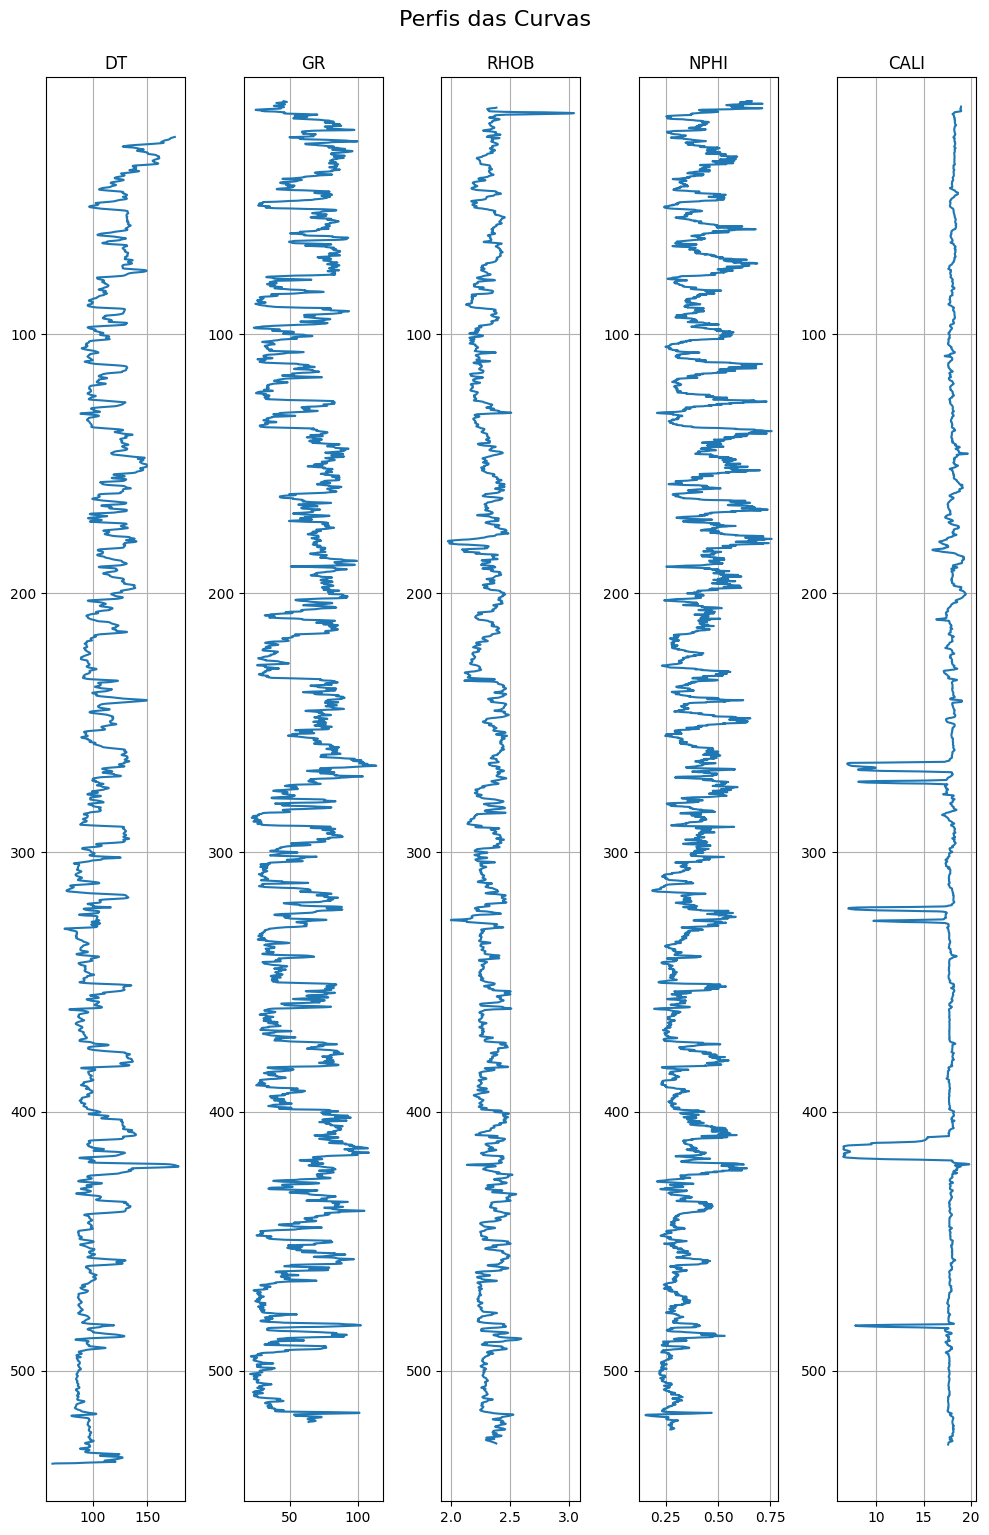

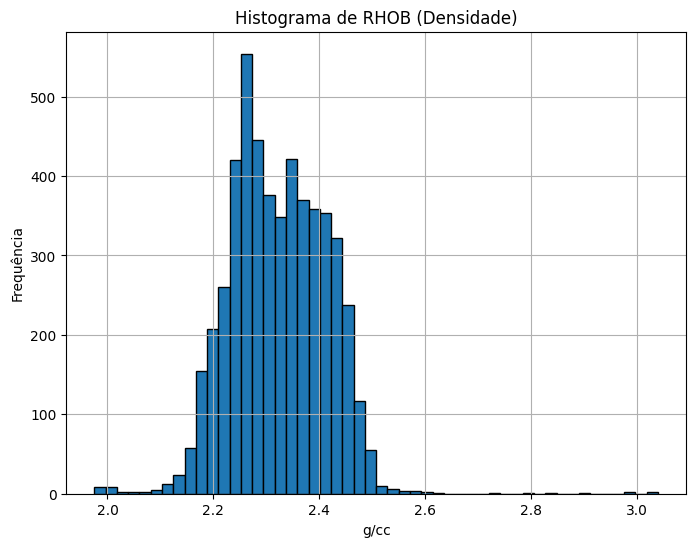

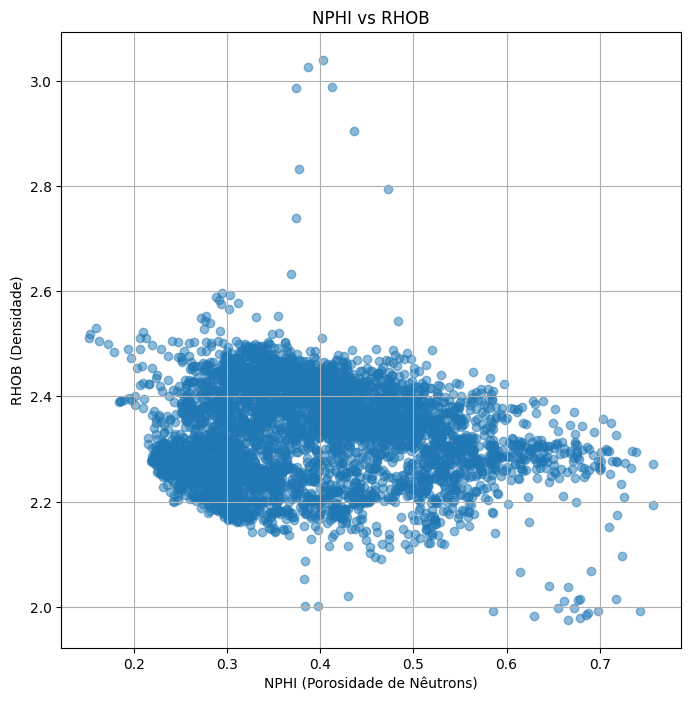

In [5]:
    # Gráficos de Perfil (Curvas vs Profundidade)
    colunas = df_limpo.columns
    num_colunas = len(colunas)

    fig, eixos = plt.subplots(1, num_colunas, figsize=(num_colunas * 2, 15))

    for i in range(num_colunas):
        curva = colunas[i]
        eixo = eixos[i]
        eixo.plot(df_limpo[curva], df_limpo.index)
        eixo.set_title(curva)
        eixo.set_ylim(df_limpo.index.max(), df_limpo.index.min())  # profundidade de cima para baixo
        eixo.grid(True)

    plt.tight_layout()
    plt.suptitle("Perfis das Curvas", y=1.02, fontsize=16)
    plt.savefig("log_perfis.png")
    plt.show()

    # Histograma da curva RHOB
    plt.figure(figsize=(8, 6))
    df_limpo["RHOB"].hist(bins=50, edgecolor='black')
    plt.title("Histograma de RHOB (Densidade)")
    plt.xlabel("g/cc")
    plt.ylabel("Frequência")
    plt.savefig("rhob_histograma.png")
    plt.show()

    # Gráfico de Dispersão NPHI vs RHOB
    plt.figure(figsize=(8, 8))
    plt.scatter(df_limpo["NPHI"], df_limpo["RHOB"], alpha=0.5)
    plt.title("NPHI vs RHOB")
    plt.xlabel("NPHI (Porosidade de Nêutrons)")
    plt.ylabel("RHOB (Densidade)")
    plt.grid(True)
    plt.savefig("nphi_rhob_crossplot.png")
    plt.show()

###4. Análise Estatística
Extrai informações estatísticas das curvas definidas

In [6]:
    # cria tabela com principais parâmetros estatísticos
    print("Resumo Estatístico:")
    print(df_limpo.describe())

    # cria tabela correlacionando as curvas
    print("\nCorrelação entre curvas:")
    print(df_limpo.corr())

Resumo Estatístico:
                DT           GR         RHOB         NPHI         CALI
count  5120.000000  5097.000000  5155.000000  5126.000000  5163.000000
mean    108.779831    59.136581     2.322644     0.385287    17.646118
std      17.759892    21.025400     0.090336     0.106954     1.662374
min      63.143700    20.322100     1.975200     0.152400     6.507400
25%      95.340446    38.618000     2.256650     0.297625    17.696100
50%     104.225098    62.445599     2.319000     0.365450    17.912500
75%     124.698952    77.598297     2.390100     0.457350    18.123650
max     178.731705   113.784203     3.040300     0.757200    19.817400

Correlação entre curvas:
            DT        GR      RHOB      NPHI      CALI
DT    1.000000  0.719441  0.195705  0.681638  0.088668
GR    0.719441  1.000000  0.545048  0.505018 -0.139029
RHOB  0.195705  0.545048  1.000000 -0.029792  0.055010
NPHI  0.681638  0.505018 -0.029792  1.000000 -0.007493
CALI  0.088668 -0.139029  0.055010 -0.00